In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
transaction_app = pd.read_csv('/data/notebook_files/транзакции в Мобильном интернет Банкинге.csv',     
                              encoding='cp1251', 
                              sep=';',
                              skiprows=1 
)
clients_patterns = pd.read_csv('/data/notebook_files/поведенческие паттерны клиентов.csv',
                              encoding='cp1251', 
                              sep=';',
                              skiprows=1 )

- cst_dim_id - Уникальный идентификатор клиента
- transdate - Дата совершенной транзакции
- transdatetime - Дата и время совершенной транзакции
- amount - Сумма совершенного перевода
- docno - Уникальный идентификатор транзакции
- direction - Зашифрованный идентификатор получателя/destination транзакции
- target - Размеченные транзакции(переводы), где 1 - мошенническая операция, 0 - чистая

In [3]:
transaction_app

,cst_dim_id,transdate,transdatetime,amount,docno,direction,target
0,2.937833e+09,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0
1,2.096229e+09,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0
2,2.937760e+09,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0
3,2.933493e+09,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0
4,4.560006e+08,'2024-12-18 00:00:00.000','2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0
...,...,...,...,...,...,...,...
13108,2.938282e+09,'2025-02-11 00:00:00.000','2025-02-11 17:43:15.000',239000.0,3829,8cfe18d7e0cff4060f90649295efdaf6,0
13109,2.684693e+09,'2024-12-02 00:00:00.000','2024-12-02 09:33:18.000',148000.0,8466,0f4b6e1a4bc070cdfdef75c13e38a3e6,0
13110,4.560884e+08,'2025-07-06 00:00:00.000','2025-07-06 14:19:44.000',2400.0,8926,f17d6300fb05c9772d4943dc6f0b09d6,0
13111,4.529667e+08,'2025-06-12 00:00:00.000','2025-06-12 16:09:44.000',200000.0,3574,7d1e70b8accfc86fff6ecb2a90704dd6,1


- transdate - Дата расчета паттернов
- cst_dim_id - ID клиента 
- monthly_os_changes - Количество смен операционной системы за месяц
- monthly_phone_model_changes - Количество смен модели телефона за месяц
- last_phone_model_categorical - Последняя модель телефона 
- last_os_categorical - Последняя операционная система
- logins_last_7_days - Количество логинов за последние 7 дней
- logins_last_30_days - Количество логинов за последние 30 дней
- login_frequency_7d - Средняя частота логинов в день (7 дней)
- login_frequency_30d - Средняя частота логинов в день (30 дней)
- freq_change_7d_vs_mean - Изменение частоты логинов относительно средней
- logins_7d_over_30d_ratio - Соотношение логинов: 7 дней / 30 дней
- avg_login_interval_30d - Средний интервал между логинами в часах (30 дней)
- std_login_interval_30d - Стандартное отклонение интервалов между логинами
- var_login_interval_30d - Дисперсия интервалов между логинами
- ewm_login_interval_7d - Экспоненциальное скользящее среднее интервалов (7 дней)
- burstiness_login_interval - Мера резких изменений активности (0-1)
- fano_factor_login_interval - Фактор Фано (variance/mean) - регулярность поведения
- zscore_avg_login_interval_7d - Z-score отклонения от нормального поведения

In [4]:
clients_patterns

,transdate,cst_dim_id,monthly_os_changes,monthly_phone_model_changes,last_phone_model_categorical,last_os_categorical,logins_last_7_days,logins_last_30_days,login_frequency_7d,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,avg_login_interval_30d,std_login_interval_30d,var_login_interval_30d,ewm_login_interval_7d,burstiness_login_interval,fano_factor_login_interval,zscore_avg_login_interval_7d
0,'2025-03-05 00:00:00.000',4.530244e+08,2,2,Vivo V2116,Android/13,6,20,0.857143,0.6666666666666666,0.2857142857142857,0.300000,131460.000000,213919.478309,45761543200,23007.164410,0.238750,348102.412901,-0.221074
1,'2025-05-19 00:00:00.000',4.986364e+08,1,1,Xiaomi_m2006c3mg,Android/10,2,22,0.285714,0.7333333333333333,-0.6103896103896104,0.090909,101520.000000,82733.726442,6844869490.909091,178980.000000,-0.101959,67423.852353,0.936257
2,'2025-08-04 00:00:00.000',2.934905e+09,1,1,"iPhone16,1",iOS/18.5,2,2,0.285714,0.06666666666666667,3.2857142857142856,1.000000,67800.000000,-1.000000,-1.0,67800.000000,-1.000000,-1.000000,-1.000000
3,'2025-03-05 00:00:00.000',4.561731e+08,1,2,Vivo V2058,Android/13,5,37,0.714286,1.2333333333333334,-0.42084942084942084,0.135135,61394.594595,76777.321398,5894757081.081081,9400.733945,0.111330,96014.268357,-0.508739
4,'2025-06-26 00:00:00.000',2.933725e+09,1,1,"iPhone12,1",iOS/17.6.1,37,119,5.285714,3.966666666666667,0.33253301320528206,0.310924,22751.500000,33089.101678,1094888649.8319328,18828.504487,0.185127,48123.800621,-0.231693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8582,'2025-03-04 00:00:00.000',4.529513e+08,1,1,"iPhone10,5",iOS/16.7.10,16,40,2.285714,1.3333333333333333,0.7142857142857143,0.400000,47551.000000,87805.264382,7709764453.220339,12899.501572,0.297395,162136.746929,-0.151050
8583,'2025-03-30 00:00:00.000',4.529102e+08,2,2,"iPhone14,2",iOS/18.1,7,38,1.000000,1.2666666666666666,-0.21052631578947364,0.184211,68701.621622,97972.572168,9598624897.297297,19188.443255,0.175618,139714.677336,0.209940
8584,'2025-03-30 00:00:00.000',4.549666e+08,1,1,Xiaomi 2201117SG,Android/13,8,26,1.142857,0.8666666666666667,0.31868131868131855,0.307692,85338.181818,129096.796955,16665982984.09091,1043.012171,0.204065,195293.391879,-0.133728
8585,'2025-03-04 00:00:00.000',4.509121e+08,2,2,Xiaomi M2006C3LG,Android/11,37,62,5.285714,2.066666666666667,1.5576036866359444,0.596774,40484.545455,62661.679989,3926486139.020979,116861.355300,0.215007,96987.284776,-0.403456


In [5]:
print(f"train data shape: {transaction_app.shape}")
print(f"test data shape: {clients_patterns.shape}")

train data shape: (13113, 7)
test data shape: (8587, 19)


In [6]:
transaction_app.columns

Index(['cst_dim_id', 'transdate', 'transdatetime', 'amount', 'docno',
       'direction', 'target'],
      dtype='object')

In [7]:
print(transaction_app.dtypes)

cst_dim_id       float64
transdate         object
transdatetime     object
amount           float64
docno              int64
direction         object
target             int64
dtype: object


In [8]:
clients_patterns.columns

Index(['transdate', 'cst_dim_id', 'monthly_os_changes',
       'monthly_phone_model_changes', 'last_phone_model_categorical',
       'last_os_categorical', 'logins_last_7_days', 'logins_last_30_days',
       'login_frequency_7d', 'login_frequency_30d', 'freq_change_7d_vs_mean',
       'logins_7d_over_30d_ratio', 'avg_login_interval_30d',
       'std_login_interval_30d', 'var_login_interval_30d',
       'ewm_login_interval_7d', 'burstiness_login_interval',
       'fano_factor_login_interval', 'zscore_avg_login_interval_7d'],
      dtype='object')

In [9]:
print(clients_patterns.dtypes)

transdate                        object
cst_dim_id                      float64
monthly_os_changes                int64
monthly_phone_model_changes       int64
last_phone_model_categorical     object
last_os_categorical              object
logins_last_7_days                int64
logins_last_30_days               int64
login_frequency_7d              float64
login_frequency_30d              object
freq_change_7d_vs_mean           object
logins_7d_over_30d_ratio        float64
avg_login_interval_30d          float64
std_login_interval_30d          float64
var_login_interval_30d           object
ewm_login_interval_7d           float64
burstiness_login_interval       float64
fano_factor_login_interval      float64
zscore_avg_login_interval_7d    float64
dtype: object


In [10]:
cols_to_convert = ['login_frequency_30d', 'freq_change_7d_vs_mean', 'var_login_interval_30d']

for col in cols_to_convert:
    clients_patterns[col] = pd.to_numeric(clients_patterns[col], errors='coerce')

In [11]:
transaction_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13113 entries, 0 to 13112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cst_dim_id     13107 non-null  float64
 1   transdate      13113 non-null  object 
 2   transdatetime  13113 non-null  object 
 3   amount         13113 non-null  float64
 4   docno          13113 non-null  int64  
 5   direction      13113 non-null  object 
 6   target         13113 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 717.2+ KB


In [12]:
transaction_app.describe()

,cst_dim_id,amount,docno,target
count,1.310700e+04,1.311300e+04,13113.000000,13113.000000
mean,1.605214e+09,4.894066e+04,6557.000000,0.012583
std,1.165205e+09,1.573271e+05,3785.541375,0.111470
min,4.506808e+08,-5.000000e+04,1.000000,0.000000
25%,4.555189e+08,4.000000e+03,3279.000000,0.000000
50%,2.094722e+09,1.000000e+04,6557.000000,0.000000
75%,2.935480e+09,4.000000e+04,9835.000000,0.000000
max,2.939234e+09,5.024700e+06,13113.000000,1.000000


In [13]:
transaction_app.isna().sum().reset_index()

,index,0
0,cst_dim_id,6
1,transdate,0
2,transdatetime,0
3,amount,0
4,docno,0
5,direction,0
6,target,0


In [14]:
clients_patterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8587 entries, 0 to 8586
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transdate                     8587 non-null   object 
 1   cst_dim_id                    8579 non-null   float64
 2   monthly_os_changes            8587 non-null   int64  
 3   monthly_phone_model_changes   8587 non-null   int64  
 4   last_phone_model_categorical  8581 non-null   object 
 5   last_os_categorical           8581 non-null   object 
 6   logins_last_7_days            8587 non-null   int64  
 7   logins_last_30_days           8587 non-null   int64  
 8   login_frequency_7d            8587 non-null   float64
 9   login_frequency_30d           7357 non-null   float64
 10  freq_change_7d_vs_mean        8560 non-null   float64
 11  logins_7d_over_30d_ratio      8562 non-null   float64
 12  avg_login_interval_30d        8587 non-null   float64
 13  std

In [15]:
clients_patterns.describe()

,cst_dim_id,monthly_os_changes,monthly_phone_model_changes,logins_last_7_days,logins_last_30_days,login_frequency_7d,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,avg_login_interval_30d,std_login_interval_30d,var_login_interval_30d,ewm_login_interval_7d,burstiness_login_interval,fano_factor_login_interval,zscore_avg_login_interval_7d
count,8.579000e+03,8587.000000,8587.000000,8587.000000,8587.000000,8587.000000,7357.000000,8560.000000,8562.000000,8.587000e+03,8.587000e+03,8.194000e+03,8587.000000,8587.000000,8.587000e+03,8587.000000
mean,1.557609e+09,1.352975,1.301153,10.773262,40.342960,1.539037,1.210249,0.237327,0.288778,1.081113e+05,1.495195e+05,2.636915e+10,54907.521079,0.170607,2.473760e+05,-0.207341
std,1.162270e+09,0.654068,0.552952,11.143044,36.162239,1.591863,1.154864,0.854740,0.199467,1.391332e+05,1.445235e+05,5.032160e+10,73691.775583,0.194279,2.903474e+05,0.506718
min,4.506808e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-1.686303
25%,4.549666e+08,1.000000,1.000000,4.000000,16.000000,0.571429,0.500000,-0.323308,0.157895,4.334337e+04,6.097138e+04,3.565322e+09,6878.026240,0.087355,7.989213e+04,-0.421857
50%,4.996781e+08,1.000000,1.000000,8.000000,30.000000,1.142857,0.866667,0.071429,0.250000,7.453833e+04,1.068451e+05,1.039082e+10,27338.196805,0.175398,1.482977e+05,-0.230262
75%,2.935090e+09,2.000000,2.000000,15.000000,54.000000,2.142857,1.566667,0.591837,0.371429,1.278805e+05,1.863126e+05,2.989617e+10,74128.482418,0.274896,3.006404e+05,-0.005730
max,2.939195e+09,6.000000,5.000000,180.000000,388.000000,25.714286,12.933333,3.285714,1.000000,2.746920e+06,1.754968e+06,9.695277e+11,582180.000000,0.682886,2.856432e+06,4.890622


In [16]:
clients_patterns.isna().sum().reset_index()

,index,0
0,transdate,0
1,cst_dim_id,8
2,monthly_os_changes,0
3,monthly_phone_model_changes,0
4,last_phone_model_categorical,6
5,last_os_categorical,6
6,logins_last_7_days,0
7,logins_last_30_days,0
8,login_frequency_7d,0
9,login_frequency_30d,1230


In [17]:
# we are removing null values from first dataset, they are jsut 6 and when we do merge they would be without join anyway
transaction_app = transaction_app.dropna(subset=['cst_dim_id'])

print(transaction_app.isna().sum())

cst_dim_id       0
transdate        0
transdatetime    0
amount           0
docno            0
direction        0
target           0
dtype: int64


In [18]:
# now we merge the two datasets 

main_info = pd.merge(transaction_app, clients_patterns, on=['cst_dim_id', 'transdate'], how='left')
main_info

,cst_dim_id,transdate,transdatetime,amount,docno,direction,target,monthly_os_changes,monthly_phone_model_changes,last_phone_model_categorical,...,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,avg_login_interval_30d,std_login_interval_30d,var_login_interval_30d,ewm_login_interval_7d,burstiness_login_interval,fano_factor_login_interval,zscore_avg_login_interval_7d
0,2.937833e+09,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0,1.0,1.0,"iPhone16,1",...,1.533333,0.211180,0.282609,49814.117647,106759.606690,1.139761e+10,18227.846189,0.363698,228802.880771,-0.213134
1,2.096229e+09,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0,1.0,1.0,Samsung SM-S918B,...,1.766667,-0.110512,0.207547,50667.857143,78912.726908,6.227218e+09,6872.638130,0.217971,122902.739907,0.026791
2,2.937760e+09,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.933493e+09,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0,0.0,0.0,Vivo_v2339,...,0.000000,NaN,NaN,1350.000000,1824.335495,3.328200e+06,-1.000000,0.149428,2465.333333,-1.000000
4,4.560006e+08,'2024-12-18 00:00:00.000','2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0,1.0,1.0,Samsung SM-A536E,...,0.433333,1.307692,0.538462,213360.000000,425545.970020,NaN,127828.033176,0.332108,848750.340270,-0.408581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,2.938282e+09,'2025-02-11 00:00:00.000','2025-02-11 17:43:15.000',239000.0,3829,8cfe18d7e0cff4060f90649295efdaf6,0,2.0,2.0,Xiaomi 23090RA98G,...,1.066667,1.946429,0.687500,79044.000000,147092.893722,2.163632e+10,5797.086414,0.300919,273725.006117,-0.353642
13122,2.684693e+09,'2024-12-02 00:00:00.000','2024-12-02 09:33:18.000',148000.0,8466,0f4b6e1a4bc070cdfdef75c13e38a3e6,0,1.0,1.0,"iPhone12,1",...,0.200000,-1.000000,0.000000,223260.000000,164917.937775,2.719793e+10,-1.000000,-0.150297,121821.760279,-1.000000
13123,4.560884e+08,'2025-07-06 00:00:00.000','2025-07-06 14:19:44.000',2400.0,8926,f17d6300fb05c9772d4943dc6f0b09d6,0,1.0,1.0,Xiaomi 2209116AG,...,0.266667,1.142857,0.500000,307193.333333,432412.450445,NaN,74712.949640,0.169305,608673.779704,-0.532115
13124,4.529667e+08,'2025-06-12 00:00:00.000','2025-06-12 16:09:44.000',200000.0,3574,7d1e70b8accfc86fff6ecb2a90704dd6,1,1.0,2.0,Xiaomi 23021RAAEG,...,5.133333,-0.749536,0.058442,15344.245810,42547.794089,1.810315e+09,84881.033076,0.469901,117980.043091,0.960173


In [19]:
main_info.columns

Index(['cst_dim_id', 'transdate', 'transdatetime', 'amount', 'docno',
       'direction', 'target', 'monthly_os_changes',
       'monthly_phone_model_changes', 'last_phone_model_categorical',
       'last_os_categorical', 'logins_last_7_days', 'logins_last_30_days',
       'login_frequency_7d', 'login_frequency_30d', 'freq_change_7d_vs_mean',
       'logins_7d_over_30d_ratio', 'avg_login_interval_30d',
       'std_login_interval_30d', 'var_login_interval_30d',
       'ewm_login_interval_7d', 'burstiness_login_interval',
       'fano_factor_login_interval', 'zscore_avg_login_interval_7d'],
      dtype='object')

In [20]:
print(main_info.isna().sum())

cst_dim_id                         0
transdate                          0
transdatetime                      0
amount                             0
docno                              0
direction                          0
target                             0
monthly_os_changes               378
monthly_phone_model_changes      378
last_phone_model_categorical     380
last_os_categorical              380
logins_last_7_days               378
logins_last_30_days              378
login_frequency_7d               378
login_frequency_30d             2353
freq_change_7d_vs_mean           420
logins_7d_over_30d_ratio         417
avg_login_interval_30d           378
std_login_interval_30d           378
var_login_interval_30d           907
ewm_login_interval_7d            378
burstiness_login_interval        378
fano_factor_login_interval       378
zscore_avg_login_interval_7d     378
dtype: int64


In [21]:
# we delete the unique values
main_info = main_info.drop(columns=['docno', 'direction', 'cst_dim_id'], errors='ignore')

In [22]:
# for every phone model it would be individual column after encoing categorial data, there for we make it simplier

def device_type(a):
    a = str(a).lower()   
    if 'ios' in a:
        return 'IOS'
    elif 'android' in a:
        return 'Android'
    else:
        return 'unknown'
        
main_info['device_type'] = main_info['last_os_categorical'].apply(device_type)

In [23]:
# working with time
main_info['trans_datetime'] = pd.to_datetime(main_info['transdatetime'])
                                             
main_info['hour'] = main_info['trans_datetime'].dt.hour
main_info['day_of_week'] = main_info['trans_datetime'].dt.dayofweek  
main_info['day'] = main_info['trans_datetime'].dt.day
main_info['month'] = main_info['trans_datetime'].dt.month

main_info = main_info.drop(columns=['transdate', 'transdatetime', 'trans_datetime'])

In [24]:
# defining numerical and categorial columns
num_cols = list(main_info.select_dtypes(include=[np.number]).columns.difference(['target']))
cat_cols = list(main_info.select_dtypes(include='object').columns.difference(['last_phone_model_categorical', 'last_os_categorical']))

In [25]:
num_cols

['amount',
 'avg_login_interval_30d',
 'burstiness_login_interval',
 'day',
 'day_of_week',
 'ewm_login_interval_7d',
 'fano_factor_login_interval',
 'freq_change_7d_vs_mean',
 'hour',
 'login_frequency_30d',
 'login_frequency_7d',
 'logins_7d_over_30d_ratio',
 'logins_last_30_days',
 'logins_last_7_days',
 'month',
 'monthly_os_changes',
 'monthly_phone_model_changes',
 'std_login_interval_30d',
 'var_login_interval_30d',
 'zscore_avg_login_interval_7d']

In [26]:
cat_cols

['device_type']

In [27]:
# working with null data
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

main_info[num_cols] = imputer_num.fit_transform(main_info[num_cols])
main_info[cat_cols] = imputer_cat.fit_transform(main_info[cat_cols])

In [28]:
print(main_info.isna().sum())

amount                            0
target                            0
monthly_os_changes                0
monthly_phone_model_changes       0
last_phone_model_categorical    380
last_os_categorical             380
logins_last_7_days                0
logins_last_30_days               0
login_frequency_7d                0
login_frequency_30d               0
freq_change_7d_vs_mean            0
logins_7d_over_30d_ratio          0
avg_login_interval_30d            0
std_login_interval_30d            0
var_login_interval_30d            0
ewm_login_interval_7d             0
burstiness_login_interval         0
fano_factor_login_interval        0
zscore_avg_login_interval_7d      0
device_type                       0
hour                              0
day_of_week                       0
day                               0
month                             0
dtype: int64


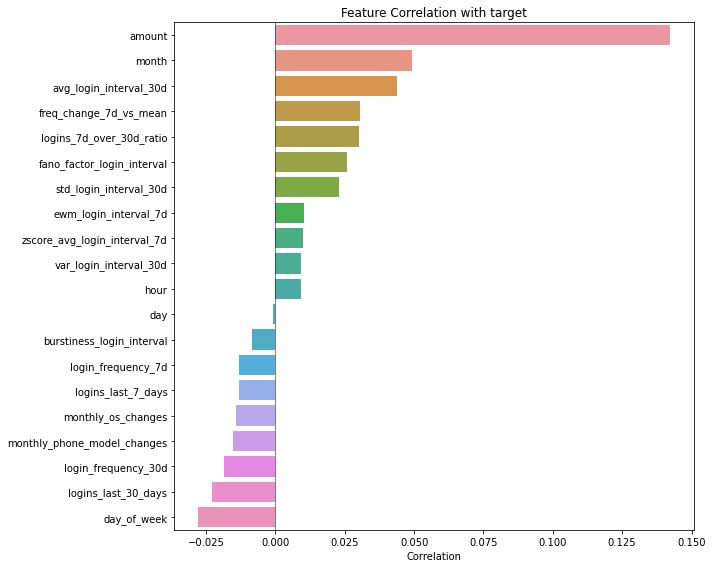

In [29]:
# looking for correlation before encoding

correlations = main_info.corr()['target'].drop('target').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with target') 
plt.xlabel('Correlation')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)  
plt.tight_layout()
plt.show()

In [30]:
# encoding phone models 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_phone = LabelEncoder()
le_os = LabelEncoder()

main_info['phone_encoded'] = le_phone.fit_transform(main_info['last_phone_model_categorical'].astype(str))

main_info['os_encoded'] = le_os.fit_transform(main_info['last_os_categorical'].astype(str))

main_info = main_info.drop(columns=['last_phone_model_categorical', 'last_os_categorical'])

In [31]:
# encoding categories

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

main_info_categories_encoded = encoder.fit_transform(main_info[cat_cols])
main_info_categories_encoded = pd.DataFrame(main_info_categories_encoded, columns=encoder.get_feature_names_out(cat_cols),index=main_info.index)

main_info = main_info.drop(columns=cat_cols)

main_info = pd.concat([main_info, main_info_categories_encoded], axis=1)

In [32]:
print(main_info.shape)

(13126, 26)


In [33]:
list(main_info.columns)

['amount',
 'target',
 'monthly_os_changes',
 'monthly_phone_model_changes',
 'logins_last_7_days',
 'logins_last_30_days',
 'login_frequency_7d',
 'login_frequency_30d',
 'freq_change_7d_vs_mean',
 'logins_7d_over_30d_ratio',
 'avg_login_interval_30d',
 'std_login_interval_30d',
 'var_login_interval_30d',
 'ewm_login_interval_7d',
 'burstiness_login_interval',
 'fano_factor_login_interval',
 'zscore_avg_login_interval_7d',
 'hour',
 'day_of_week',
 'day',
 'month',
 'phone_encoded',
 'os_encoded',
 'device_type_Android',
 'device_type_IOS',
 'device_type_unknown']

In [34]:
main_info.head()

,amount,target,monthly_os_changes,monthly_phone_model_changes,logins_last_7_days,logins_last_30_days,login_frequency_7d,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,...,zscore_avg_login_interval_7d,hour,day_of_week,day,month,phone_encoded,os_encoded,device_type_Android,device_type_IOS,device_type_unknown
0,31000.0,0,1.000000,1.000000,13.000000,46.000000,1.857143,1.533333,0.211180,0.282609,...,-0.213134,16.0,6.0,5.0,1.0,253,29,0.0,1.0,0.0
1,4000.0,0,1.000000,1.000000,11.000000,53.000000,1.571429,1.766667,-0.110512,0.207547,...,0.026791,17.0,1.0,4.0,3.0,92,4,1.0,0.0,0.0
2,3000.0,0,1.371352,1.317618,12.095152,44.873235,1.727879,1.349321,0.250895,0.291944,...,-0.192372,10.0,4.0,20.0,6.0,263,54,0.0,0.0,1.0
3,500.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250895,0.291944,...,-1.000000,14.0,6.0,6.0,7.0,157,5,1.0,0.0,0.0
4,20000.0,0,1.000000,1.000000,7.000000,13.000000,1.000000,0.433333,1.307692,0.538462,...,-0.408581,14.0,2.0,18.0,12.0,77,4,1.0,0.0,0.0


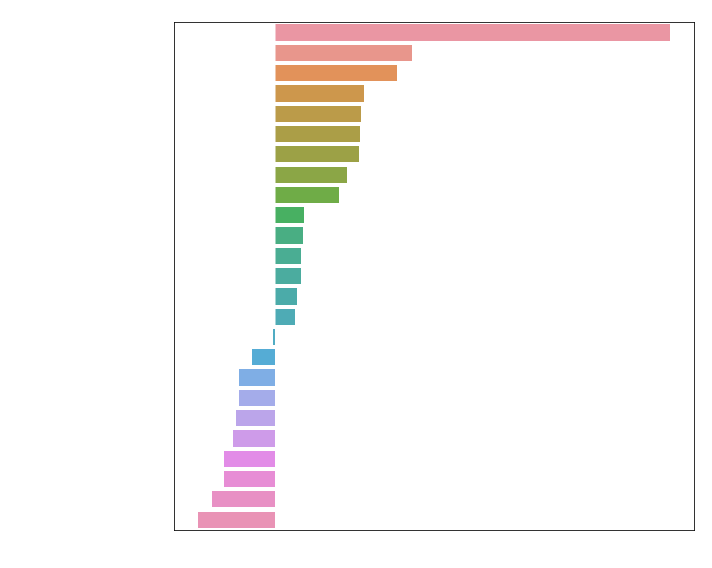

In [35]:
# correlations 

correlations = main_info.corr()['target'].drop('target').sort_values(ascending=False)

plt.rcParams.update({
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white'
})

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Feature Correlation with target') 
plt.xlabel('Correlation')
plt.axvline(x=0, color='white', linestyle='-', linewidth=0.5)  
plt.tight_layout()
plt.show()

In [36]:
# seperating data into train and validation data

from sklearn.model_selection import train_test_split

X = main_info.drop('target', axis=1)
y = main_info['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# we start to create a model with xgboost

!pip install xgboost

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 

model_1 = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# trainig model
model_1.fit(X_train, y_train)
train_accuracy_model_1 = model_1.score(X_train, y_train)
print(f"model_1 accuracy on train data: {train_accuracy_model_1:.4f}")

validation_accuracy_model_1 = model_1.score(X_val, y_val)
print(f"model_1 accuracy on validation data: {validation_accuracy_model_1:.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 2.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
model_1 accuracy on train data: 0.9996
model_1 accuracy on validation data: 0.9882


In [38]:
# the more metrics, because out data is disbalanced 

from sklearn.metrics import classification_report, roc_auc_score

y_pred_model_1 = model_1.predict(X_val)
y_proba_model_1 = model_1.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred_model_1))
print(f'ROC-AUC: {roc_auc_score(y_val, y_proba_model_1):.4f}')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.67      0.12      0.21        33

    accuracy                           0.99      2626
   macro avg       0.83      0.56      0.60      2626
weighted avg       0.98      0.99      0.98      2626

ROC-AUC: 0.9509


In [45]:
# and now we try a another model with lightboom

!pip install lightgbm

from lightgbm import LGBMClassifier

model_2 = LGBMClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced',  
    verbose=-1
)

# training model
model_2.fit(X_train, y_train)
train_accuracy_model_2 = model_2.score(X_train, y_train)
print(f"model_2 accuracy on train data: {train_accuracy_model_2:.4f}")

validation_accuracy_model_2 = model_2.score(X_val, y_val)
print(f"model_2 accuracy on validation data: {validation_accuracy_model_2:.4f}")


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
model_2 accuracy on train data: 0.9990
model_2 accuracy on validation data: 0.9840


In [47]:
y_pred_model_2 = model_2.predict(X_val)
y_proba_model_2 = model_2.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred_model_2))
print(f'ROC-AUC: {roc_auc_score(y_val, y_proba_model_2):.4f}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2593
           1       0.30      0.21      0.25        33

    accuracy                           0.98      2626
   macro avg       0.65      0.60      0.62      2626
weighted avg       0.98      0.98      0.98      2626

ROC-AUC: 0.9549


In [49]:
!pip install optuna

import optuna

from sklearn.model_selection import cross_val_score

def objective(trial):  # trial, не param
    params = {  # params, не param, и без фигурных скобок после двоеточия
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 2, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }
    
    model = XGBClassifier(
        **params,  # было params, но выше определил param
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )
    
    score = cross_val_score(model, X, y, cv=5, scoring='f1').mean()  # model, не model_3
    return score  # было score_, а возвращал score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_params)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.0/606.0 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
{'n_estimators': 569, 'max_depth': 5, 'learning_rate': 0.2486801760798512, 'subsample': 0.9382470797906921, 'colsample_bytree': 0.7325834907716935}


[I 2025-11-27 12:06:57,794] A new study created in memory with name: no-name-53c0ffa7-72dc-49f7-bbce-86c7db991dcc
[I 2025-11-27 12:06:59,570] Trial 0 finished with value: 0.4636264304171281 and parameters: {'n_estimators': 174, 'max_depth': 8, 'learning_rate': 0.11106336479038628, 'subsample': 0.8593110506458754, 'colsample_bytree': 0.6233440035971847}. Best is trial 0 with value: 0.4636264304171281.
[I 2025-11-27 12:07:03,058] Trial 1 finished with value: 0.480819703768032 and parameters: {'n_estimators': 602, 'max_depth': 6, 'learning_rate': 0.26114098837102473, 'subsample': 0.950917044464875, 'colsample_bytree': 0.9180982655869155}. Best is trial 1 with value: 0.480819703768032.
[I 2025-11-27 12:07:07,134] Trial 2 finished with value: 0.4395418246349923 and parameters: {'n_estimators': 604, 'max_depth': 12, 'learning_rate': 0.14973898442142564, 'subsample': 0.5152129827408731, 'colsample_bytree': 0.8373909474097098}. Best is trial 1 with value: 0.480819703768032.
[I 2025-11-27 12:07

In [50]:
print(study.best_params)
print(f"Best F1: {study.best_value:.4f}")

{'n_estimators': 569, 'max_depth': 5, 'learning_rate': 0.2486801760798512, 'subsample': 0.9382470797906921, 'colsample_bytree': 0.7325834907716935}
Best F1: 0.5122


In [53]:
# making model with best parameters

model_3 = XGBClassifier(
    **study.best_params,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

model_3.fit(X_train, y_train)
print(f"model_3 accuracy on train data: {model_3.score(X_train, y_train):.4f}")
print(f"model_3 accuracy on validation data: {model_3.score(X_val, y_val):.4f}")

model_3 accuracy on train data: 1.0000
model_3 accuracy on validation data: 0.9890


In [54]:
y_pred_model_3 = model_3.predict(X_val)
y_proba_model_3 = model_3.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred_model_3))
print(f'ROC-AUC: {roc_auc_score(y_val, y_proba_model_3):.4f}')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.75      0.18      0.29        33

    accuracy                           0.99      2626
   macro avg       0.87      0.59      0.64      2626
weighted avg       0.99      0.99      0.99      2626

ROC-AUC: 0.9315


In [55]:
# Optuna for LightGBM

from lightgbm import LGBMClassifier

def objective_lgbm(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 2, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "class_weight": "balanced",
    }
    
    model_lgbc = LGBMClassifier(
        **params,
        random_state=42,
        verbose=-1
    )
    
    score = cross_val_score(model_lgbc, X, y, cv=5, scoring='f1').mean()
    return score

study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)
print(study_lgbm.best_params)
print(f"Best F1: {study_lgbm.best_value:.4f}")

{'n_estimators': 610, 'max_depth': 4, 'learning_rate': 0.15192969749078628, 'subsample': 0.890372104738693, 'colsample_bytree': 0.8787905431519923}
Best F1: 0.5468


[I 2025-11-27 12:18:09,706] A new study created in memory with name: no-name-1b2a2b16-f9dc-4701-8557-c2ddbfbf1f97
[I 2025-11-27 12:18:11,888] Trial 0 finished with value: 0.26946173503196336 and parameters: {'n_estimators': 645, 'max_depth': 2, 'learning_rate': 0.07435357760227329, 'subsample': 0.8844996599589094, 'colsample_bytree': 0.9477403367843387}. Best is trial 0 with value: 0.26946173503196336.
[I 2025-11-27 12:18:16,698] Trial 1 finished with value: 0.5421713554987212 and parameters: {'n_estimators': 781, 'max_depth': 5, 'learning_rate': 0.21565795097073548, 'subsample': 0.864992329095944, 'colsample_bytree': 0.9515909917535811}. Best is trial 1 with value: 0.5421713554987212.
[I 2025-11-27 12:18:19,678] Trial 2 finished with value: 0.40414822620302066 and parameters: {'n_estimators': 527, 'max_depth': 4, 'learning_rate': 0.051341832294500234, 'subsample': 0.8314218177794359, 'colsample_bytree': 0.9628897832019553}. Best is trial 1 with value: 0.5421713554987212.
[I 2025-11-27

In [56]:
model_4 = LGBMClassifier(
    **study_lgbm.best_params,
    random_state=42,
    verbose=-1
)

model_4.fit(X_train, y_train)
print(f"model_4 accuracy on train data: {model_4.score(X_train, y_train):.4f}")
print(f"model_4 accuracy on validation data: {model_4.score(X_val, y_val):.4f}")

model_4 accuracy on train data: 1.0000
model_4 accuracy on validation data: 0.9886


In [57]:
y_pred_model_4 = model_4.predict(X_val)
y_proba_model_4 = model_4.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred_model_4))
print(f'ROC-AUC: {roc_auc_score(y_val, y_proba_model_4):.4f}')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.80      0.12      0.21        33

    accuracy                           0.99      2626
   macro avg       0.89      0.56      0.60      2626
weighted avg       0.99      0.99      0.98      2626

ROC-AUC: 0.9634


In [ ]:
# model_2 performs best with recall -> 0.21 and precision -> 0.30
# since this is an anti-fraud model we need to catch as many frauds as possible

In [61]:
# now we make final test with best parameters 

def objective_final(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 30, 100), 
    }
    
    model_5 = XGBClassifier(
        **params,
        eval_metric='logloss',
        random_state=42,
        verbosity=0
    )
    
    score = cross_val_score(model_5, X, y, cv=5, scoring='f1').mean()
    return score

study_final = optuna.create_study(direction="maximize")
study_final.optimize(objective_final, n_trials=100)

print(study_final.best_params)
print(f"best F1: {study_final.best_value:.4f}")

{'n_estimators': 495, 'max_depth': 15, 'learning_rate': 0.08475900965411973, 'subsample': 0.5010048820756142, 'colsample_bytree': 0.6959826602037199, 'min_child_weight': 1, 'reg_alpha': 0.13716599504117544, 'reg_lambda': 0.15623212472380305, 'scale_pos_weight': 71.17267667513336}
Best F1: 0.5550


In [64]:
model_5 = XGBClassifier(
    **study_final.best_params,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)

model_5.fit(X_train, y_train)

y_pred_model_5 = model_5.predict(X_val)
y_proba_model_5 = model_5.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred_model_5))
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba_model_5):.4f}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.86      0.18      0.30        33

    accuracy                           0.99      2626
   macro avg       0.92      0.59      0.65      2626
weighted avg       0.99      0.99      0.99      2626

ROC-AUC: 0.9323


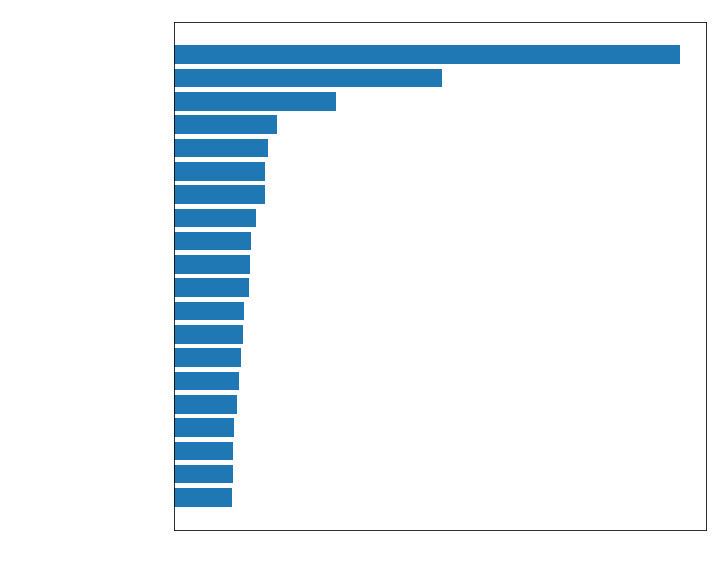

In [66]:
# feature Importance

import matplotlib.pyplot as plt

feature_importance = model_5.feature_importances_
feature_names = X_train.columns

# sort by importance
sorted_idx = feature_importance.argsort()[::-1][:20]  # топ-20

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx][::-1])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx][::-1])
plt.xlabel('feature Importance')
plt.title('top 20 most important features')
plt.tight_layout()
plt.show()

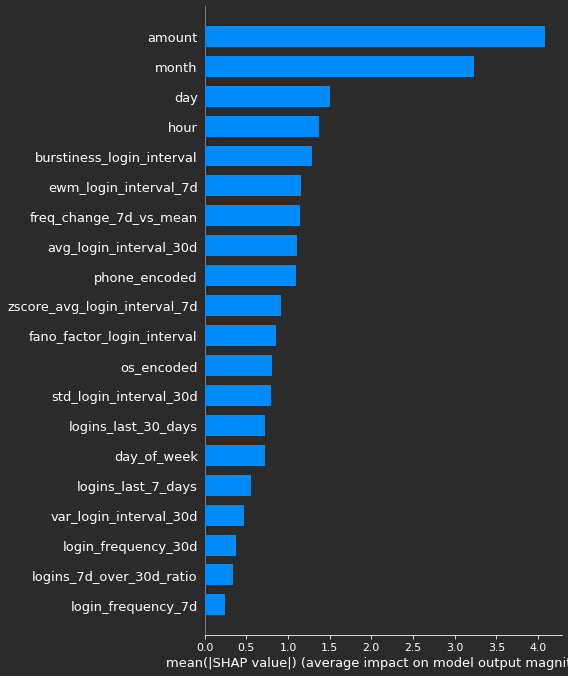

In [69]:
# shap

import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model_5)
shap_values = explainer.shap_values(X_val)

fig, ax = plt.subplots(figsize=(10, 8))
shap.summary_plot(shap_values, X_val, plot_type="bar", max_display=20, show=False)
ax.set_facecolor('#2b2b2b')
fig.patch.set_facecolor('#2b2b2b')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.tight_layout()
plt.show()

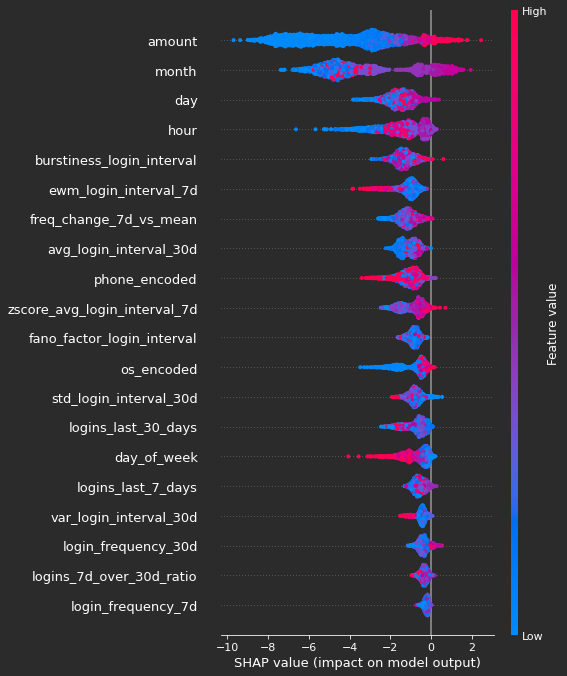

In [70]:
# SHAP plot id details
fig, ax = plt.subplots(figsize=(10, 8))
shap.summary_plot(shap_values, X_val, max_display=20, show=False)
ax.set_facecolor('#2b2b2b')
fig.patch.set_facecolor('#2b2b2b')
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import classification_report, precision_recall_curve

def evaluate_threshold(model, X_val, y_val, threshold=0.5):
    """Оценка модели при разных порогах"""
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    print(f"Threshold: {threshold}")
    print(classification_report(y_val, y_pred))
    return y_pred

# testing different thresholds
for thresh in [0.5, 0.4, 0.3, 0.2, 0.1]:
    evaluate_threshold(model_5, X_val, y_val, threshold=thresh)
    print("-" * 50)

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.86      0.18      0.30        33

    accuracy                           0.99      2626
   macro avg       0.92      0.59      0.65      2626
weighted avg       0.99      0.99      0.99      2626

--------------------------------------------------
Threshold: 0.4
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.75      0.18      0.29        33

    accuracy                           0.99      2626
   macro avg       0.87      0.59      0.64      2626
weighted avg       0.99      0.99      0.99      2626

--------------------------------------------------
Threshold: 0.3
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2593
           1       0.70      0.21      0.33        33

    accuracy                       

In [72]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# testing with different data
for scoring in ['f1', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model_5, X, y, cv=cv, scoring=scoring)
    print(f"{scoring}: mean={scores.mean():.4f}, std={scores.std():.4f}")

f1: mean=0.5161, std=0.0711
precision: mean=0.6932, std=0.0493
recall: mean=0.4182, std=0.0844
roc_auc: mean=0.9465, std=0.0044


In [73]:
import joblib

# saving model
joblib.dump(model_5, 'model_5_antifraud.pkl')

# saving the list of columns
joblib.dump(X_train.columns.tolist(), 'model_5_columns.pkl')

# loading best parameters
joblib.dump(study_final.best_params, 'model_5_best_params.pkl')

Сохранено:
- model_5_antifraud.pkl
- model_5_columns.pkl
- model_5_best_params.pkl
